#  CLASSIFYING CIFAR IMAGES

#####  Importing libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import metrics
from tensorflow import keras
from keras.layers import Dropout,Dense,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam, SGD
import seaborn as sns

##### Loading the dataset

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
df = unpickle("cifar-10-batches-py/data_batch_1")

In [4]:
df.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [5]:
df[b'data'][0]

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)

In [6]:
df[b'data'].shape

(10000, 3072)

In [7]:
df[b'labels'][0]

6

In [8]:
len(df[b'labels'])

10000

In [9]:
df[b'batch_label']

b'training batch 1 of 5'

In [10]:
def reshape(shape):
    new_shape =np.reshape(shape,(10000,3,32,32)).transpose(0,2,3,1)
    return new_shape


#Loading cifar-10 data from the batches
batch1=unpickle('cifar-10-batches-py/data_batch_1')
batch2=unpickle('cifar-10-batches-py/data_batch_2')
batch3=unpickle('cifar-10-batches-py/data_batch_3')
batch4=unpickle('cifar-10-batches-py/data_batch_4')
batch5=unpickle('cifar-10-batches-py/data_batch_5')
test_batch=unpickle('cifar-10-batches-py/test_batch')

#Extracting the arrays reshaping ithe batches batch_sizex32x32x3
batch1_data= reshape(batch1[b'data'])
batch2_data= reshape(batch2[b'data'])
batch3_data= reshape(batch3[b'data'])
batch4_data= reshape(batch4[b'data'])
batch5_data= reshape(batch5[b'data'])

#Extracting lables frm the batches
batch1_labels=batch1[b'labels']
batch2_labels=batch2[b'labels']
batch3_labels=batch3[b'labels']
batch4_labels=batch4[b'labels']
batch5_labels=batch5[b'labels']


X_test= reshape(test_batch[b'data'])
y_test= test_batch[b'labels']


X_train = np.concatenate((batch1_data,batch2_data,batch3_data,batch4_data,batch5_data),axis=0)
y_train = np.concatenate((batch1_labels,batch2_labels,batch3_labels,batch4_labels,batch5_labels),axis=0)

In [11]:
a = unpickle("cifar-10-batches-py/batches.meta")
class_names = a[b'label_names']

##### Preprocessing

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [14]:
class_names

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [15]:
class_names =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [16]:
y_train[0]

6

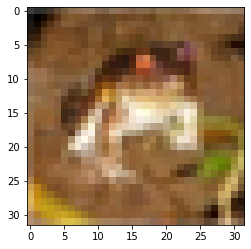

In [17]:
plt.imshow(X_train[0]);

In [18]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [19]:
np.array(y_train[0])

array(6)

In [20]:
y_train[0].tolist()

6

'bird'

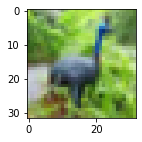

In [21]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[6])
class_names[y_train[6]]

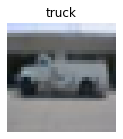

In [22]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[110]);
plt.title(class_names[y_train[110]]);
plt.axis("off");

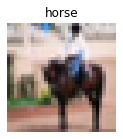

In [23]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[11]);
plt.title(class_names[y_train[11]]);
plt.axis("off");

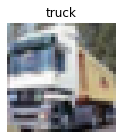

In [24]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[1]);
plt.title(class_names[y_train[1]]);
plt.axis("off");

In [25]:
print(type(y_test))

<class 'list'>


In [26]:
y_test = np.array(y_test)

#### Modelling

In [27]:
#Training our model with one hidden layer without scaling our data
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
    
])
model.compile(
    optimizer = 'SGD',
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train,y_train, epochs = 5)

2023-06-23 13:02:41.033989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-23 13:02:41.067012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-23 13:02:41.067502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-23 13:02:41.068790: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/5
1563/1563 [==============================] - 2s 967us/step - loss: 42.5705 - accuracy: 0.0968
Epoch 2/5
1563/1563 [==============================] - 2s 969us/step - loss: 2.3027 - accuracy: 0.1002
Epoch 3/5
1563/1563 [==============================] - 2s 967us/step - loss: 2.3027 - accuracy: 0.0968
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0985
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0986


In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 891us/step - loss: 2.3026 - accuracy: 0.1000


[2.3025875091552734, 0.10000000149011612]

In [29]:
#Scaling the data
X_train = (X_train)/255
X_test = (X_test)/255

In [30]:
#training the model on scaled data
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
    
])
model.compile(
    optimizer = 'SGD',
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train,y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0626 - accuracy: 0.2405
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8752 - accuracy: 0.3277
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8112 - accuracy: 0.3534
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7781 - accuracy: 0.3674
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7468 - accuracy: 0.3815


In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 987us/step - loss: 1.7415 - accuracy: 0.3796


[1.7415202856063843, 0.37959998846054077]

In [32]:
#Converting the RGB imaages to gray scale
X_train1 = tf.image.rgb_to_grayscale(X_train)
X_test1 = tf.image.rgb_to_grayscale(X_test)

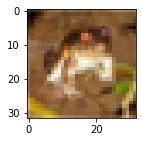

In [33]:
plt.figure(figsize=(2,2));
plt.imshow(X_train[0]);

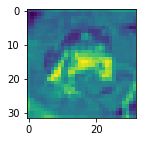

In [34]:
plt.figure(figsize=(2,2));
plt.imshow(X_train1[0]);

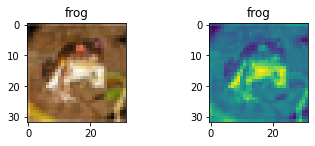

In [69]:
plt.subplot(2,2,1);
plt.imshow(X_train[0]);
plt.title(class_names[y_train[0]]);
plt.subplot(2,2,2);
plt.imshow(X_train1[0]);
plt.title(class_names[y_train[0]]);

In [35]:
#Training the model using single channeled images
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,1)),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
    
])
model.compile(
    optimizer = 'SGD',
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train1,y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1481 - accuracy: 0.2153
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0589 - accuracy: 0.2613
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0289 - accuracy: 0.2758
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0052 - accuracy: 0.2869
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9800 - accuracy: 0.2951


In [36]:
model.evaluate(X_test1, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.9714 - accuracy: 0.3005


[1.9714248180389404, 0.3005000054836273]

In [37]:
#Raising the number of epochs from 5 to 100
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
    
])
model.compile(
    optimizer = 'SGD',
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0240 - accuracy: 0.2589
Epoch 2/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8289 - accuracy: 0.3431
Epoch 3/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7701 - accuracy: 0.3685
Epoch 4/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7306 - accuracy: 0.3858
Epoch 5/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7003 - accuracy: 0.3962
Epoch 6/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6782 - accuracy: 0.4037
Epoch 7/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6603 - accuracy: 0.4099
Epoch 8/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6442 - accuracy: 0.4147
Epoch 9/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6299 - accuracy: 0.4221
Epoch 10/100
1563/1563 [==============================] - 2s 1ms/step - l

In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.5408 - accuracy: 0.4515


[1.5407955646514893, 0.4514999985694885]

In [39]:
#Changing the activation function of the output layer to soft max
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
    
])
model.compile(
    optimizer = 'SGD',
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9713 - accuracy: 0.2818
Epoch 2/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8343 - accuracy: 0.3371
Epoch 3/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7841 - accuracy: 0.3584
Epoch 4/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7492 - accuracy: 0.3718
Epoch 5/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7241 - accuracy: 0.3811
Epoch 6/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7012 - accuracy: 0.3905
Epoch 7/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6832 - accuracy: 0.4002
Epoch 8/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6664 - accuracy: 0.4062
Epoch 9/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6535 - accuracy: 0.4106
Epoch 10/100
1563/1563 [==============================] - 2s 1ms/step - l

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.5195 - accuracy: 0.4656


[1.5194814205169678, 0.46560001373291016]

In [41]:
#Adding hidden layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
    
])
model.compile(
    optimizer = SGD(learning_rate = 0.001),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2651 - accuracy: 0.1400
Epoch 2/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1308 - accuracy: 0.2041
Epoch 3/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0359 - accuracy: 0.2368
Epoch 4/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9852 - accuracy: 0.2657
Epoch 5/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9498 - accuracy: 0.2827
Epoch 6/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9184 - accuracy: 0.2966
Epoch 7/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8880 - accuracy: 0.3118
Epoch 8/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8615 - accuracy: 0.3253
Epoch 9/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8379 - accuracy: 0.3379
Epoch 10/100
1563/1563 [==============================] - 2s 1ms/step - l

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.5037 - accuracy: 0.4591


[1.5036826133728027, 0.45910000801086426]

In [43]:
#Reducing learning rate
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
    
])
model.compile(
    optimizer = SGD(learning_rate = 0.0001),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3049 - accuracy: 0.0999
Epoch 2/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2938 - accuracy: 0.0985
Epoch 3/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2862 - accuracy: 0.1100
Epoch 4/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2805 - accuracy: 0.1137
Epoch 5/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2753 - accuracy: 0.1186
Epoch 6/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2701 - accuracy: 0.1234
Epoch 7/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2650 - accuracy: 0.1295
Epoch 8/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2591 - accuracy: 0.1381
Epoch 9/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2521 - accuracy: 0.1473
Epoch 10/100
1563/1563 [==============================] - 2s 1ms/step - l

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.8456 - accuracy: 0.3320


[1.8456052541732788, 0.3319999873638153]

In [45]:
#Raising learning rate
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
    
])
model.compile(
    optimizer = SGD(learning_rate = 0.01),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0644 - accuracy: 0.2246
Epoch 2/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9086 - accuracy: 0.2942
Epoch 3/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8422 - accuracy: 0.3249
Epoch 4/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7843 - accuracy: 0.3517
Epoch 5/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7399 - accuracy: 0.3704
Epoch 6/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7040 - accuracy: 0.3841
Epoch 7/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6786 - accuracy: 0.3940
Epoch 8/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6562 - accuracy: 0.4017
Epoch 9/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6366 - accuracy: 0.4067
Epoch 10/100
1563/1563 [==============================] - 2s 1ms/step - l

In [46]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.5199 - accuracy: 0.4632


[1.5199193954467773, 0.46320000290870667]

In [47]:
#Increassing epochs to 1000
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
    
])
model.compile(
    optimizer = SGD(learning_rate = 0.01),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train,y_train, epochs = 1000

Epoch 1/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0123 - accuracy: 0.2602
Epoch 2/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8325 - accuracy: 0.3413
Epoch 3/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7628 - accuracy: 0.3664
Epoch 4/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7093 - accuracy: 0.3861
Epoch 5/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6702 - accuracy: 0.4015
Epoch 6/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6417 - accuracy: 0.4132
Epoch 7/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6230 - accuracy: 0.4200
Epoch 8/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6007 - accuracy: 0.4286
Epoch 9/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5861 - accuracy: 0.4337
Epoch 10/1000
1563/1563 [==============================] - 2s 1m

1563/1563 [==============================] - 2s 1ms/step - loss: 1.3248 - accuracy: 0.5261
Epoch 80/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3208 - accuracy: 0.5263
Epoch 81/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3207 - accuracy: 0.5279
Epoch 82/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3210 - accuracy: 0.5278
Epoch 83/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3198 - accuracy: 0.5277
Epoch 84/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3166 - accuracy: 0.5291
Epoch 85/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3164 - accuracy: 0.5277
Epoch 86/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3143 - accuracy: 0.5307
Epoch 87/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3148 - accuracy: 0.5277
Epoch 88/1000
1563/1563 [==============================] - 2s 1ms/ste

1563/1563 [==============================] - 2s 1ms/step - loss: 1.2045 - accuracy: 0.5675
Epoch 234/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2048 - accuracy: 0.5669
Epoch 235/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2062 - accuracy: 0.5660
Epoch 236/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2041 - accuracy: 0.5655
Epoch 237/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2014 - accuracy: 0.5686
Epoch 238/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2013 - accuracy: 0.5694
Epoch 239/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2013 - accuracy: 0.5697
Epoch 240/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2011 - accuracy: 0.5690
Epoch 241/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2035 - accuracy: 0.5689
Epoch 242/1000
1563/1563 [==============================] - 2

1563/1563 [==============================] - 2s 1ms/step - loss: 1.1499 - accuracy: 0.5880
Epoch 388/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1464 - accuracy: 0.5890
Epoch 389/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1501 - accuracy: 0.5873
Epoch 390/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1475 - accuracy: 0.5877
Epoch 391/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1502 - accuracy: 0.5862
Epoch 392/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1470 - accuracy: 0.5884
Epoch 393/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1497 - accuracy: 0.5872
Epoch 394/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1464 - accuracy: 0.5894
Epoch 395/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1461 - accuracy: 0.5900
Epoch 396/1000
1563/1563 [==============================] - 2

1563/1563 [==============================] - 2s 1ms/step - loss: 1.1094 - accuracy: 0.6038
Epoch 542/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1105 - accuracy: 0.6009
Epoch 543/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1097 - accuracy: 0.6000
Epoch 544/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1115 - accuracy: 0.5992
Epoch 545/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1101 - accuracy: 0.6017
Epoch 546/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1054 - accuracy: 0.6013
Epoch 547/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1103 - accuracy: 0.6014
Epoch 548/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1084 - accuracy: 0.6022
Epoch 549/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1074 - accuracy: 0.6031
Epoch 550/1000
1563/1563 [==============================] - 2

1563/1563 [==============================] - 2s 1ms/step - loss: 1.0806 - accuracy: 0.6112
Epoch 696/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0813 - accuracy: 0.6116
Epoch 697/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0757 - accuracy: 0.6123
Epoch 698/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0768 - accuracy: 0.6116
Epoch 699/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0826 - accuracy: 0.6090
Epoch 700/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0791 - accuracy: 0.6105
Epoch 701/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0772 - accuracy: 0.6118
Epoch 702/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0788 - accuracy: 0.6121
Epoch 703/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0781 - accuracy: 0.6122
Epoch 704/1000
1563/1563 [==============================] - 2

1563/1563 [==============================] - 2s 1ms/step - loss: 1.0548 - accuracy: 0.6190
Epoch 850/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0515 - accuracy: 0.6211
Epoch 851/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0516 - accuracy: 0.6206
Epoch 852/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0521 - accuracy: 0.6205
Epoch 853/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0521 - accuracy: 0.6211
Epoch 854/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0504 - accuracy: 0.6191
Epoch 855/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0535 - accuracy: 0.6231
Epoch 856/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0520 - accuracy: 0.6216
Epoch 857/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0518 - accuracy: 0.6217
Epoch 858/1000
1563/1563 [==============================] - 2

In [48]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.8456 - accuracy: 0.4374


[1.8455584049224854, 0.4374000132083893]

In [49]:
#Itroducing dropout layer to cater for the overfitting 
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation = "softmax")
    
])
model.compile(
    optimizer = SGD(learning_rate = 0.01),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train,y_train, epochs = 1000)

Epoch 1/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0621 - accuracy: 0.2314
Epoch 2/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8984 - accuracy: 0.3075
Epoch 3/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8398 - accuracy: 0.3317
Epoch 4/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8013 - accuracy: 0.3504
Epoch 5/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7666 - accuracy: 0.3629
Epoch 6/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7436 - accuracy: 0.3734
Epoch 7/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7218 - accuracy: 0.3838
Epoch 8/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6998 - accuracy: 0.3895
Epoch 9/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6841 - accuracy: 0.3970
Epoch 10/1000
1563/1563 [==============================] - 2s 1m

1563/1563 [==============================] - 2s 1ms/step - loss: 1.4161 - accuracy: 0.4934
Epoch 80/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4147 - accuracy: 0.4926
Epoch 81/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4119 - accuracy: 0.4921
Epoch 82/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4078 - accuracy: 0.4950
Epoch 83/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4102 - accuracy: 0.4940
Epoch 84/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4070 - accuracy: 0.4944
Epoch 85/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4062 - accuracy: 0.4965
Epoch 86/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4008 - accuracy: 0.4988
Epoch 87/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4016 - accuracy: 0.4963
Epoch 88/1000
1563/1563 [==============================] - 2s 1ms/ste

1563/1563 [==============================] - 2s 1ms/step - loss: 1.2890 - accuracy: 0.5355
Epoch 234/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2882 - accuracy: 0.5361
Epoch 235/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2876 - accuracy: 0.5354
Epoch 236/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2891 - accuracy: 0.5334
Epoch 237/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2873 - accuracy: 0.5380
Epoch 238/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2893 - accuracy: 0.5344
Epoch 239/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2895 - accuracy: 0.5345
Epoch 240/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2852 - accuracy: 0.5363
Epoch 241/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2873 - accuracy: 0.5340
Epoch 242/1000
1563/1563 [==============================] - 2

1563/1563 [==============================] - 2s 1ms/step - loss: 1.2321 - accuracy: 0.5533
Epoch 388/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2315 - accuracy: 0.5516
Epoch 389/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2333 - accuracy: 0.5522
Epoch 390/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2323 - accuracy: 0.5566
Epoch 391/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2311 - accuracy: 0.5544
Epoch 392/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2344 - accuracy: 0.5513
Epoch 393/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2312 - accuracy: 0.5554
Epoch 394/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2297 - accuracy: 0.5550
Epoch 395/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2317 - accuracy: 0.5552
Epoch 396/1000
1563/1563 [==============================] - 2

1563/1563 [==============================] - 2s 1ms/step - loss: 1.1946 - accuracy: 0.5646
Epoch 542/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1902 - accuracy: 0.5693
Epoch 543/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1915 - accuracy: 0.5691
Epoch 544/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1926 - accuracy: 0.5683
Epoch 545/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1971 - accuracy: 0.5662
Epoch 546/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1961 - accuracy: 0.5656
Epoch 547/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1925 - accuracy: 0.5650
Epoch 548/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1926 - accuracy: 0.5671
Epoch 549/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1887 - accuracy: 0.5648
Epoch 550/1000
1563/1563 [==============================] - 2

1563/1563 [==============================] - 2s 1ms/step - loss: 1.1653 - accuracy: 0.5747
Epoch 696/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1671 - accuracy: 0.5751
Epoch 697/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1661 - accuracy: 0.5746
Epoch 698/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1594 - accuracy: 0.5778
Epoch 699/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1632 - accuracy: 0.5771
Epoch 700/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1605 - accuracy: 0.5772
Epoch 701/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1632 - accuracy: 0.5783
Epoch 702/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1598 - accuracy: 0.5793
Epoch 703/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1649 - accuracy: 0.5763
Epoch 704/1000
1563/1563 [==============================] - 2

1563/1563 [==============================] - 2s 1ms/step - loss: 1.1363 - accuracy: 0.5850
Epoch 850/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1400 - accuracy: 0.5837
Epoch 851/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1394 - accuracy: 0.5856
Epoch 852/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1402 - accuracy: 0.5841
Epoch 853/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1364 - accuracy: 0.5858
Epoch 854/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1394 - accuracy: 0.5841
Epoch 855/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1377 - accuracy: 0.5845
Epoch 856/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1416 - accuracy: 0.5839
Epoch 857/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1398 - accuracy: 0.5825
Epoch 858/1000
1563/1563 [==============================] - 2

In [50]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.8162 - accuracy: 0.4416


[1.8161847591400146, 0.4415999948978424]

In [51]:
#Increasing number of neurons per hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(2000, activation = "relu"),
    keras.layers.Dense(2000, activation = "relu"),
    keras.layers.Dense(2000, activation = "relu"),
    keras.layers.Dropout(0.0001),
    keras.layers.Dense(10, activation = "softmax")
    
])
model.compile(
    optimizer = SGD(learning_rate = 0.01),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8165 - accuracy: 0.3497
Epoch 2/100
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6212 - accuracy: 0.4271
Epoch 3/100
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5349 - accuracy: 0.4591
Epoch 4/100
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4679 - accuracy: 0.4778
Epoch 5/100
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4179 - accuracy: 0.4969
Epoch 6/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3695 - accuracy: 0.5161
Epoch 7/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3280 - accuracy: 0.5316
Epoch 8/100
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2916 - accuracy: 0.5437
Epoch 9/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2551 - accuracy: 0.5566
Epoch 10/100
1563/1563 [==============================] - 4s 2ms/step - l

In [52]:
predictions = model.predict(X_test)
prediction = []
for i in predictions:
    prediction.append(np.argmax(i))
    
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

313/313 [==============================] - 0s 883us/step
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1000
           1       0.70      0.69      0.69      1000
           2       0.51      0.48      0.49      1000
           3       0.41      0.41      0.41      1000
           4       0.52      0.52      0.52      1000
           5       0.50      0.48      0.49      1000
           6       0.61      0.68      0.65      1000
           7       0.66      0.64      0.65      1000
           8       0.70      0.72      0.71      1000
           9       0.63      0.63      0.63      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000

[[664  23  54  17  40  11  27  11 102  51]
 [ 32 685  17  22  11  14  17  15  55 132]
 [ 74  16 478  90 102  63  82  52  23  20]
 [ 25  22  79 414  64 187  97  54  24  34]
 [ 39   6 11

In [53]:
#Introducing Convid layers and pooling layers
model = keras.Sequential([
    
    
    layers.Conv2D(2000,(3,3),activation = "relu",input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(2000,kernel_size = (3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(2000, activation = "relu"),
    keras.layers.Dense(2000, activation = "relu"),
    keras.layers.Dense(2000, activation = "relu"),
    keras.layers.Dropout(0.0001),
    keras.layers.Dense(10, activation = "softmax")
    
])
model.compile(
    optimizer = SGD(learning_rate = 0.01),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train,y_train, epochs = 10)

Epoch 1/10


2023-06-23 14:33:10.783932: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2023-06-23 14:33:11.375407: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


1563/1563 [==============================] - 310s 197ms/step - loss: 2.0488 - accuracy: 0.2532
Epoch 2/10
1563/1563 [==============================] - 307s 196ms/step - loss: 1.6164 - accuracy: 0.4148
Epoch 3/10
1563/1563 [==============================] - 307s 196ms/step - loss: 1.3992 - accuracy: 0.4957
Epoch 4/10
1563/1563 [==============================] - 307s 197ms/step - loss: 1.2568 - accuracy: 0.5525
Epoch 5/10
1563/1563 [==============================] - 307s 197ms/step - loss: 1.1325 - accuracy: 0.5974
Epoch 6/10
1563/1563 [==============================] - 307s 197ms/step - loss: 1.0227 - accuracy: 0.6403
Epoch 7/10
1563/1563 [==============================] - 308s 197ms/step - loss: 0.9273 - accuracy: 0.6750
Epoch 8/10
1563/1563 [==============================] - 308s 197ms/step - loss: 0.8350 - accuracy: 0.7083
Epoch 9/10
1563/1563 [==============================] - 308s 197ms/step - loss: 0.7505 - accuracy: 0.7379
Epoch 10/10
1563/1563 [==============================] - 

In [54]:
predictions = model.predict(X_test)
prediction = []
for i in predictions:
    prediction.append(np.argmax(i))
    
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

313/313 [==============================] - 19s 62ms/step
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1000
           1       0.80      0.83      0.82      1000
           2       0.59      0.65      0.62      1000
           3       0.58      0.42      0.49      1000
           4       0.59      0.72      0.65      1000
           5       0.55      0.71      0.62      1000
           6       0.84      0.73      0.78      1000
           7       0.78      0.76      0.77      1000
           8       0.87      0.76      0.81      1000
           9       0.81      0.75      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

[[751  21  66  15  51  18   8   5  35  30]
 [ 22 831  18  11   4   8   7   2  24  73]
 [ 48   7 651  46  97  77  30  35   4   5]
 [  9  14  83 425 100 275  39  33   7  15]
 [ 10   5  7

In [55]:
model.fit(X_train,y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 309s 197ms/step - loss: 0.5684 - accuracy: 0.8049
Epoch 2/5
1563/1563 [==============================] - 308s 197ms/step - loss: 0.4752 - accuracy: 0.8359
Epoch 3/5
1563/1563 [==============================] - 309s 197ms/step - loss: 0.3770 - accuracy: 0.8714
Epoch 4/5
1563/1563 [==============================] - 309s 198ms/step - loss: 0.2851 - accuracy: 0.9042
Epoch 5/5
1563/1563 [==============================] - 309s 197ms/step - loss: 0.2048 - accuracy: 0.9325


In [56]:
predictions = model.predict(X_test)
prediction = []
for i in predictions:
    prediction.append(np.argmax(i))
    
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

313/313 [==============================] - 19s 62ms/step
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1000
           1       0.89      0.77      0.83      1000
           2       0.67      0.65      0.66      1000
           3       0.55      0.56      0.55      1000
           4       0.74      0.64      0.68      1000
           5       0.55      0.71      0.62      1000
           6       0.74      0.84      0.78      1000
           7       0.88      0.67      0.76      1000
           8       0.79      0.85      0.82      1000
           9       0.74      0.85      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.73     10000
weighted avg       0.74      0.72      0.73     10000

[[708  14  47  23  17  16  22   3  95  55]
 [ 12 771  12  14   2   7  18   1  39 124]
 [ 46   4 647  57  55  87  64  16  14  10]
 [ 12   6  59 555  39 214  66  13  15  21]
 [ 12   1  8

In [57]:
#Adding nomalizing layer and more convid layers
model = keras.Sequential([
    layers.Conv2D(32,(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32,(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64,(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128,(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128,(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation = "softmax"),
])

model.compile(
    optimizer = SGD(learning_rate = 0.01),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train,y_train, epochs =5 )


Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6341 - accuracy: 0.4061
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2630 - accuracy: 0.5489
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0833 - accuracy: 0.6160
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9596 - accuracy: 0.6618
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8788 - accuracy: 0.6913


In [58]:
predictions = model.predict(X_test)
prediction = []
for i in predictions:
    prediction.append(np.argmax(i))

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.45      0.60      1000
           1       0.94      0.65      0.77      1000
           2       0.57      0.53      0.55      1000
           3       0.53      0.39      0.45      1000
           4       0.52      0.69      0.59      1000
           5       0.71      0.43      0.53      1000
           6       0.43      0.95      0.59      1000
           7       0.90      0.52      0.66      1000
           8       0.67      0.92      0.77      1000
           9       0.76      0.82      0.79      1000

    accuracy                           0.63     10000
   macro avg       0.69      0.63      0.63     10000
weighted avg       0.69      0.63      0.63     10000

[[448  10 127  17  54   4  65   5 234  36]
 [  5 647   4   4   4   1  73   2  71 189]
 [ 20   2 530  39 101  39 229   9  26   5]
 [  5   1  63 392  81  89 331  12  18   8]
 [  2   2  62 

In [59]:
#Adding epochs
model = keras.Sequential([
    layers.Conv2D(32,(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32,(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64,(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128,(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128,(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation = "softmax"),
])

model.compile(
    optimizer = SGD(learning_rate = 0.01),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

hist = model.fit(X_train,y_train, epochs = 30)

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6294 - accuracy: 0.4050
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2315 - accuracy: 0.5610
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0517 - accuracy: 0.6278
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9325 - accuracy: 0.6726
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8498 - accuracy: 0.7035
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7861 - accuracy: 0.7254
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7401 - accuracy: 0.7407
Epoch 8/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6974 - accuracy: 0.7563
Epoch 9/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6660 - accuracy: 0.7689
Epoch 10/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.629

In [60]:
predictions = model.predict(X_test)
prediction = []
for i in predictions:
    prediction.append(np.argmax(i))

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.94      0.90      0.92      1000
           2       0.78      0.79      0.78      1000
           3       0.71      0.68      0.69      1000
           4       0.74      0.89      0.81      1000
           5       0.85      0.70      0.77      1000
           6       0.84      0.90      0.87      1000
           7       0.92      0.85      0.88      1000
           8       0.88      0.95      0.91      1000
           9       0.89      0.90      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

[[840   9  33   9  18   2   6   7  53  23]
 [ 12 897   3   3   2   0   5   0  27  51]
 [ 38   0 787  32  66  20  37   8   8   4]
 [ 14   3  61 676  71  70  61  23  11  10]
 [  5   2  43 

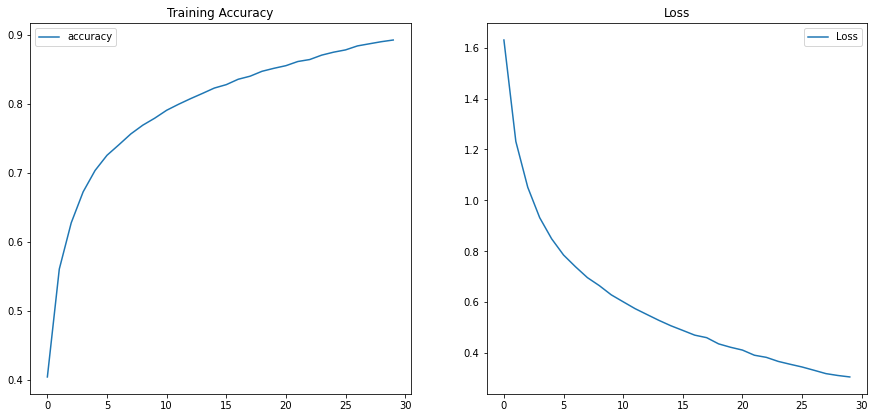

In [61]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1);
plt.plot(hist.history['accuracy'], label='accuracy');
plt.title('Training Accuracy');
plt.legend();

plt.subplot(2, 2, 2)
plt.plot(hist.history['loss'], label='Loss');
plt.title('Loss');
plt.legend();

In [62]:
model.fit(X_train,y_train, epochs = 30)

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2975 - accuracy: 0.8946
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2881 - accuracy: 0.8997
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2820 - accuracy: 0.9019
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2704 - accuracy: 0.9054
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2619 - accuracy: 0.9087
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2505 - accuracy: 0.9115
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2460 - accuracy: 0.9133
Epoch 8/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2402 - accuracy: 0.9153
Epoch 9/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2340 - accuracy: 0.9173
Epoch 10/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.220

In [63]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5805 - accuracy: 0.8536


[0.5805001258850098, 0.853600025177002]

In [64]:
predictions = model.predict(X_test)
prediction = []
for i in predictions:
    prediction.append(np.argmax(i))

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

313/313 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1000
           1       0.94      0.91      0.92      1000
           2       0.81      0.78      0.80      1000
           3       0.73      0.69      0.71      1000
           4       0.82      0.86      0.84      1000
           5       0.78      0.77      0.78      1000
           6       0.87      0.91      0.89      1000
           7       0.92      0.88      0.90      1000
           8       0.89      0.94      0.92      1000
           9       0.90      0.91      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

[[896   8  14   5  11   1   3   5  40  17]
 [ 10 906   0   3   1   1   3   0  18  58]
 [ 38   1 779  32  43  39  42  10  13   3]
 [ 13   5  47 690  45 126  43  14   8   9]
 [  7   1  42 

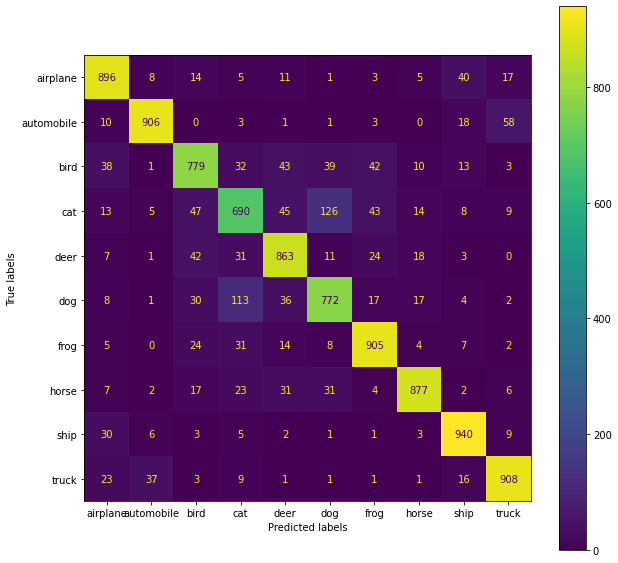

In [65]:
fig,ax =plt.subplots(figsize=(10, 10));
cm = confusion_matrix(y_test, prediction)
cmd = ConfusionMatrixDisplay(cm,display_labels = class_names);
cmd.plot(ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 

In [66]:
model.save(f"cifar_model1")

INFO:tensorflow:Assets written to: cifar_model1/assets


INFO:tensorflow:Assets written to: cifar_model1/assets
